In [1]:
import os
import random 
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_path = "csv_files/vegetables/PlantVillage"
classes = sorted(os.listdir(dataset_path))
classes

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

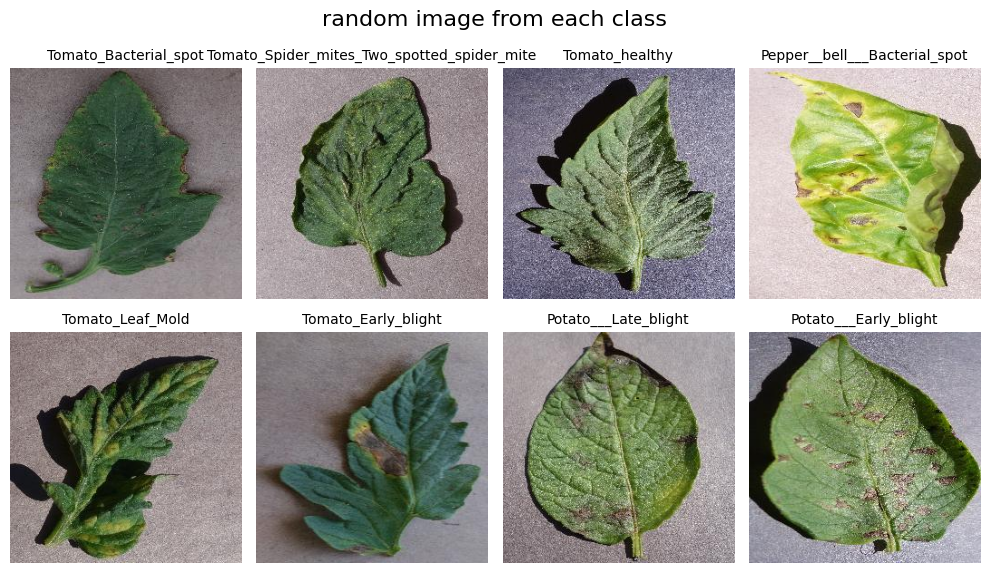

In [3]:
num_classes = min(8, len(classes))
plt.figure(figsize=(10,6))


for idx, class_name in enumerate(random.sample(classes, num_classes)):
    class_folder  = os.path.join(dataset_path, class_name)

    image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    img_name = random.choice(image_files)
    img_path = os.path.join(class_folder, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 4, idx+1)
    plt.imshow(img)
    plt.title(class_name, fontsize=10)
    plt.axis('off')

plt.suptitle("random image from each class", fontsize=16)
plt.tight_layout()

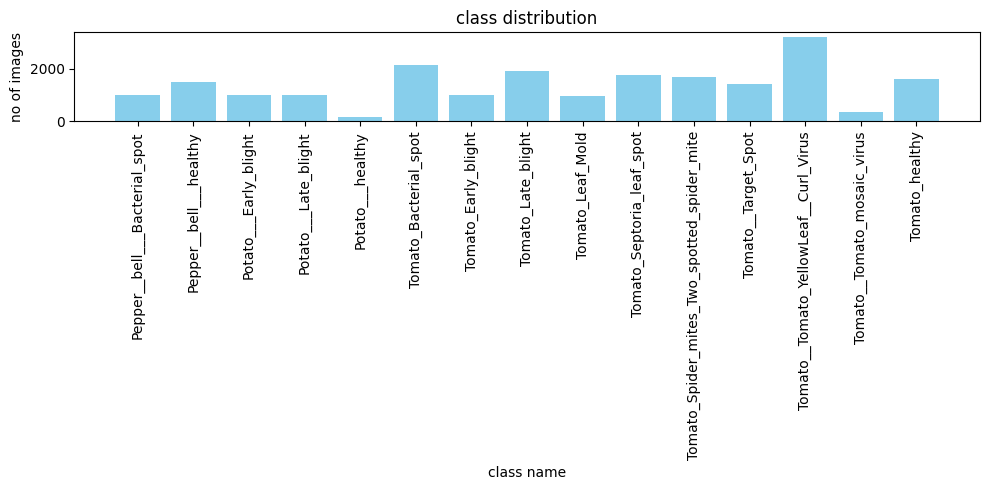

In [4]:
class_counts = {}

for c in classes:
    clf = os.path.join(dataset_path, c)
    if os.path.isdir(clf):
        img_files = [f for f in os.listdir(clf) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        class_counts[c] = len(img_files)

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('class name')
plt.ylabel('no of images')
plt.title('class distribution')
plt.tight_layout()
plt.show()

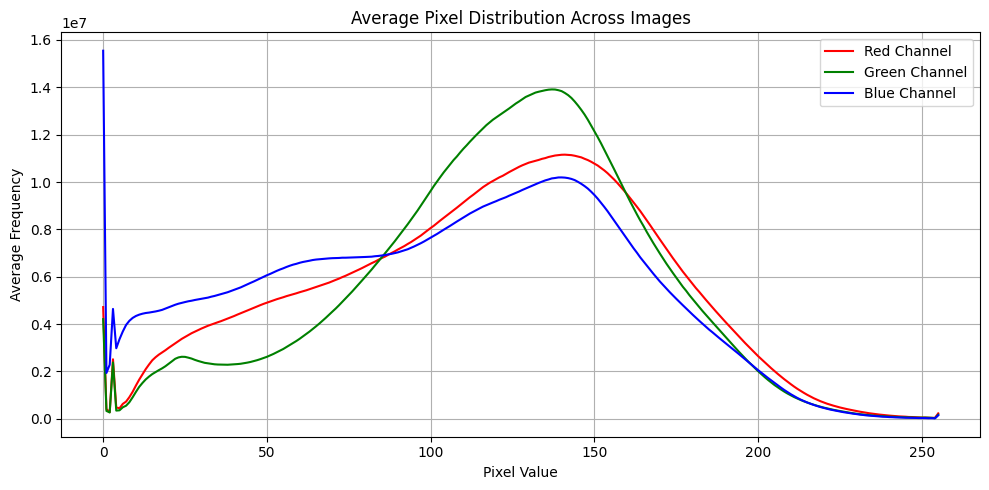

In [6]:
hist_r = np.zeros((256,))
hist_g = np.zeros((256,))
hist_b = np.zeros((256,))
num_images = 0

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if not os.path.isdir(class_path):
        continue 

    for img_name in os.listdir(class_path):
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Skipped: {img_path}")
            continue

        b, g, r = cv2.split(img)
        hist_b += cv2.calcHist([b], [0], None, [256], [0, 256]).flatten()
        hist_g += cv2.calcHist([g], [0], None, [256], [0, 256]).flatten()
        hist_r += cv2.calcHist([r], [0], None, [256], [0, 256]).flatten()
        num_images += 1


plt.figure(figsize=(10, 5))
plt.plot(hist_r, color='r', label='Red Channel')
plt.plot(hist_g, color='g', label='Green Channel')
plt.plot(hist_b, color='b', label='Blue Channel')
plt.title('Average Pixel Distribution Across Images')
plt.xlabel('Pixel Value')
plt.ylabel('Average Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
mean = np.zeros(3)
std = np.zeros(3)
n = 0
image_shapes = []
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            h, w, c = img.shape
            image_shapes.append((w, h, c))

            img = img / 255.0
            mean += img.mean(axis=(0,1))
            std += img.std(axis=(0, 1))
            n += 1 

mean /= n
std /= n

for i in image_shapes[:5]:
    print(f'height: {i[0]}, width: {i[1]}, channels: {i[2]}')

print(f'mean per channel (BGR): {mean}, std per channel (BGR): {std}')


height: 256, width: 256, channels: 3
height: 256, width: 256, channels: 3
height: 256, width: 256, channels: 3
height: 256, width: 256, channels: 3
height: 256, width: 256, channels: 3
mean per channel (BGR): [0.41131156 0.47504014 0.45880439], std per channel (BGR): [0.19125798 0.15119882 0.17416257]
